# Machine Learning for Biomedical Problems: Examples

# What Is Machine Learning?

Before we take a look at the details of various machine learning methods, let's start by looking at what machine learning is, and what it isn't.
Machine learning is often categorized as a subfield of artificial intelligence, but I find that categorization can often be misleading at first brush.
The study of machine learning certainly arose from research in this context, but in the data science application of machine learning methods, it's more helpful to think of machine learning as a means of *building models of data*.

Fundamentally, machine learning involves building mathematical models to help understand data.
"Learning" enters the fray when we give these models *tunable parameters* that can be adapted to observed data; in this way the program can be considered to be "learning" from the data.
Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.
I'll leave to the reader the more philosophical digression regarding the extent to which this type of mathematical, model-based "learning" is similar to the "learning" exhibited by the human brain.

Understanding the problem setting in machine learning is essential to using these tools effectively, and so we will start with some broad categorizations of the types of approaches we'll discuss here.
---
---

## Categories of Machine Learning

At the most fundamental level, machine learning can be categorized into two main types: supervised learning and unsupervised learning.

*Supervised learning* involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data.
This is further subdivided into *classification* tasks and *regression* tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities.
We will see examples of both types of supervised learning in the following section.

*Unsupervised learning* involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself."
These models include tasks such as *clustering* and *dimensionality reduction.*
Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data.
We will see examples of both types of unsupervised learning in the following section.

In addition, there are so-called *semi-supervised learning* methods, which falls somewhere between supervised learning and unsupervised learning.
Semi-supervised learning methods are often useful when only incomplete labels are available.

In [1]:
# For Google Colab
from google.colab import drive
drive.mount('/content/drive')
path_images = "/content/drive/MyDrive/UAB/ML4PM/Notebooks/Notebook01" # Change this path to your needs accordingly.

Mounted at /content/drive


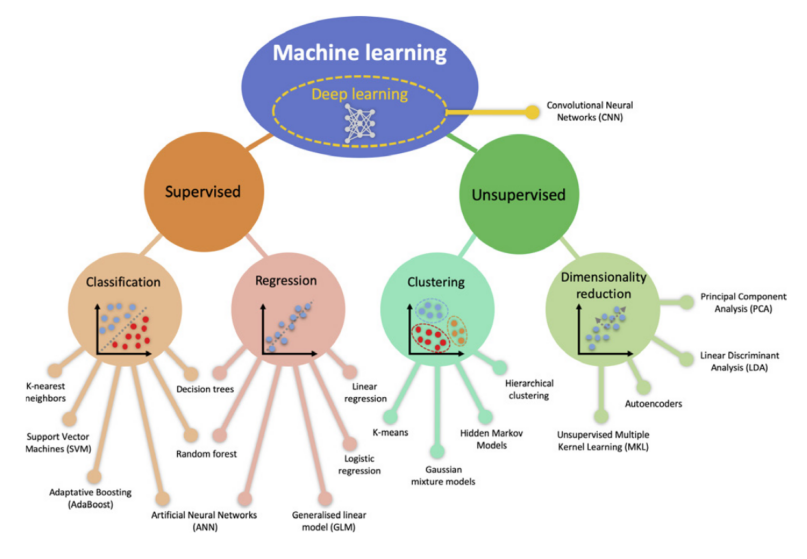

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load image (change path accordingly)
image = cv2.imread(path_images + '/image/MLClassification.png')  # Reads in BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Set figure size and display image
plt.figure(figsize=(16, 7))  # Width=16, Height=7 (adjust as needed)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()



Machine Learning in Fetal Cardiology: What to Expect?
January 2020 - Fetal Diagnosis and Therapy

You can find this paper in the **Paper** directory alongside this Jupityer Notebook.

## Pipeline of Supervised and Unsupervised learning in Medicine

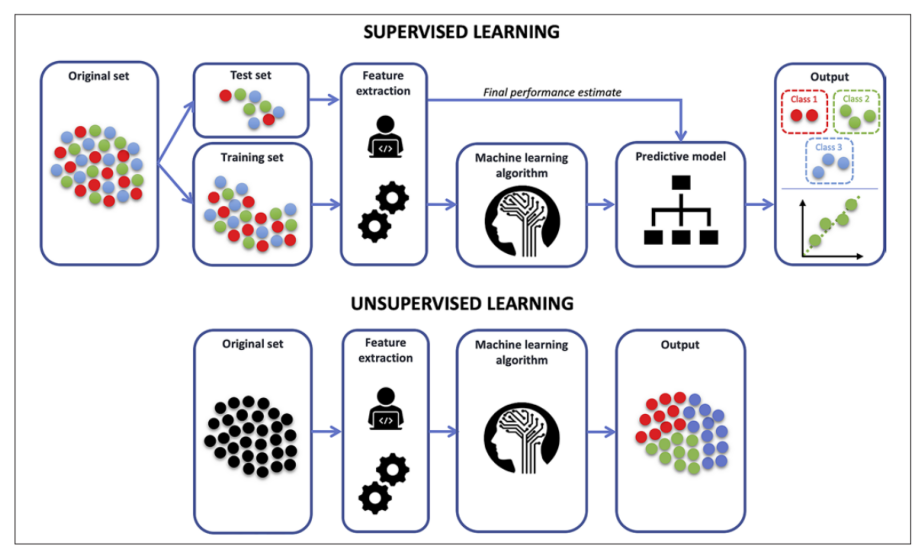

In [ ]:
# Load image (change path accordingly)
image = cv2.imread(path_images + '/image/MLPipeline.png')  # Reads in BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Set figure size and display image
plt.figure(figsize=(16, 7))  # Width=16, Height=7 (adjust as needed)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

### Supervised Learning Pipeline

1. **Original Set**: The dataset consists of labeled data points (with known outputs).

2. **Splitting Data**: The dataset is divided into a training set (used for learning) and a test set (used for evaluation).

3. **Feature Extraction**: Important features are extracted from the data.

4. **Training a Model**: A machine learning algorithm learns from the training data.

5. **Predictive Model**: The trained model makes predictions.
Evaluation: The model is tested on unseen test data to estimate performance.

6. **Final Output**: The model classifies new data into predefined categories (e.g., Class 1, Class 2, Class 3).


### Unsupervised Learning Pipeline

1. **Original Set**: The dataset consists of unlabeled data (no predefined categories).

2. **Feature Extraction**: Important features are identified for processing.

3. **Training a Model**: A machine learning algorithm analyzes patterns within the data.

4. **Output**: The algorithm groups the data into clusters or detects hidden structures (e.g., discovering three clusters).


### Key Difference

* **Supervised learning** relies on labeled data and predicts known outcomes.
* **Unsupervised learning** discovers patterns in unlabeled data, such as clustering similar items.

## Qualitative Examples of Machine Learning Applications

To make these ideas more concrete, let's take a look at a few very simple examples of a machine learning task. These examples are meant to give an intuitive, non-quantitative overview of the types of machine learning tasks we will be looking at in this chapter. In later sections, we will go into more depth regarding the particular models and how they are used.

### **Classification: Predicting discrete labels**

We will first take a look at a simple *classification* task, in which you are given a set of labeled points and want to use these to classify some unlabeled points.

Imagine that we have the data shown in this figure:

In [ ]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://cocalc.com/share/raw/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/figures/05.01-classification-1.png")

[figure source in Appendix](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Classification-Example-Figure-1)

Here we have two-dimensional data: that is, we have two *features* for each point, represented by the *(x,y)* positions of the points on the plane.
In addition, we have one of two *class labels* for each point, here represented by the colors of the points.
From these features and labels, we would like to create a model that will let us decide whether a new point should be labeled "blue" or "red."

There are a number of possible models for such a classification task, but here we will use an extremely simple one. We will make the assumption that the two groups can be separated by drawing a straight line through the plane between them, such that points on each side of the line fall in the same group.
Here the *model* is a quantitative version of the statement "a straight line separates the classes", while the *model parameters* are the particular numbers describing the location and orientation of that line for our data.
The optimal values for these model parameters are learned from the data (this is the "learning" in machine learning), which is often called *training the model*.

The following figure shows a visual representation of what the trained model looks like for this data:

In [ ]:
# import image module
from IPython.display import Image


# get the image
Image(url="https://cocalc.com/share/raw/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/figures/05.01-classification-2.png")

![](figures/05.01-classification-2.png)
[figure source in Appendix](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Classification-Example-Figure-2)

Now that this model has been trained, it can be generalized to new, unlabeled data.
In other words, we can take a new set of data, draw this model line through it, and assign labels to the new points based on this model.
This stage is usually called *prediction*. See the following figure:

In [ ]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://cocalc.com/share/raw/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/figures/05.01-classification-3.png")

![](figures/05.01-classification-3.png)
[figure source in Appendix](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Classification-Example-Figure-3)

This is the basic idea of a classification task in machine learning, where "classification" indicates that the data has discrete class labels.
At first glance this may look fairly trivial: it would be relatively easy to simply look at this data and draw such a discriminatory line to accomplish this classification.
A benefit of the machine learning approach, however, is that it can generalize to much larger datasets in many more dimensions.

For example, this is similar to the task of automated spam detection for email; in this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ normalized counts of important words or phrases ("Viagra", "Nigerian prince", etc.)
- *label* $\to$ "spam" or "not spam"

For the training set, these labels might be determined by individual inspection of a small representative sample of emails; for the remaining emails, the label would be determined using the model.
For a suitably trained classification algorithm with enough well-constructed features (typically thousands or millions of words or phrases), this type of approach can be very effective.
We will see an example of such text-based classification in [In Depth: Naive Bayes Classification](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html).

Some important classification algorithms that we will discuss in more detail are Gaussian naive Bayes (see [In Depth: Naive Bayes Classification](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html)), support vector machines (see [In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)), and random forest classification (see [In-Depth: Decision Trees and Random Forests](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)).

A real medical example of classification using ML classification

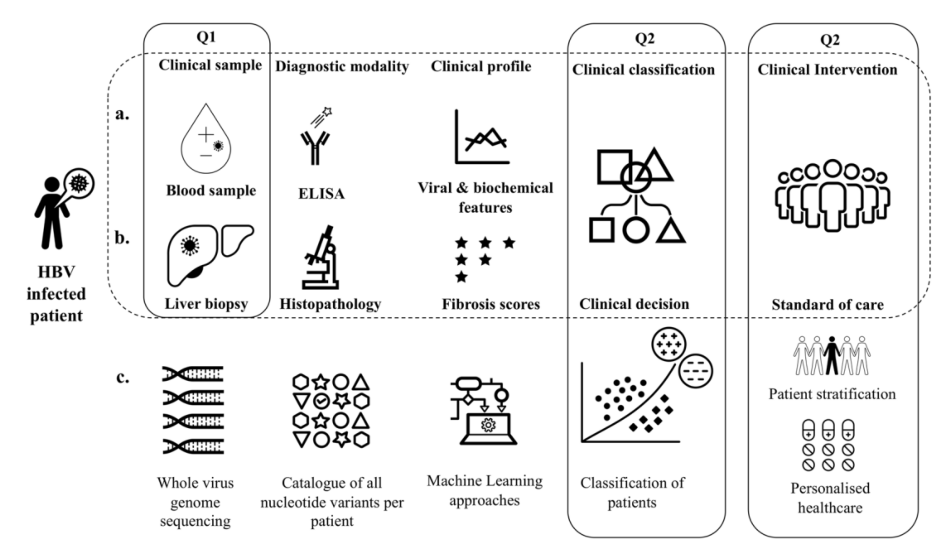

In [ ]:
# Load image (change path accordingly)
image = cv2.imread(path_images + '/image/MLPatientsHBV.png')  # Reads in BGR format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Set figure size and display image
plt.figure(figsize=(16, 7))  # Width=16, Height=7 (adjust as needed)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

2019. Machine-learning based patient classification using Hepatitis B virus full-length genome quasispecies from Asian and European cohorts. (You can find this paper in the **Paper** directory alongside this Jupityer Notebook or See in  https://www.nature.com/articles/s41598-019-55445-8)

Study summary and motivation. Patients infected with HBV have complex and dynamic clinical profiles. The diagnostic and clinical decision paradigm (dashed box) in HBV infected patients involves classification by plasma markers of viral activity (a) and biochemical and histopathological (b) evidence of liver damage. This approach defines patients broadly into four classes that will inform the clinical decision for standard-of-care including the use of interferon and/or nucleoside analogues. Using virus whole genome sequencing to catalogue all nucleotide variants occurring at >1% machine learning approaches are explored to determine whether classification of HBeAg status could be recapitulated from a diverse patient population, extend our understanding of the virological factors associated with HbeAg status and evaluate whether this type of approach may be extended to novel markers of clinical status that will inform clinical decision making for stratification of patients in clinical trials and in the appropriate patient selection for use of next-generation treatment modalities for HBV. The study sought to answer three questions (solid boxes): Q1 - that plasma HBV quasispecies profiles were representative of those in the liver; Q2 – that machine learning approaches could accurately recapitulate classification by a routinely used clinical marker; and Q3 – whether this approach has wider utility in clinical decision support and the deconvolution of complex clinical history.

### **Regression: Predicting continuous labels**

In contrast with the discrete labels of a classification algorithm, we will next look at a simple *regression* task in which the labels are continuous quantities.

Consider the data shown in the following figure, which consists of a set of points each with a continuous label:

In [ ]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://cocalc.com/share/raw/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/figures/05.01-regression-1.png")

![](figures/05.01-regression-1.png)
[figure source in Appendix](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Regression-Example-Figure-1)

As with the classification example, we have two-dimensional data: that is, there are two features describing each data point.
The color of each point represents the continuous label for that point.

There are a number of possible regression models we might use for this type of data, but here we will use a simple linear regression to predict the points.
This simple linear regression model assumes that if we treat the label as a third spatial dimension, we can fit a plane to the data.
This is a higher-level generalization of the well-known problem of fitting a line to data with two coordinates.

We can visualize this setup as shown in the following figure:

In [ ]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://cocalc.com/share/raw/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/figures/05.01-regression-2.png")

![](figures/05.01-regression-2.png)
[figure source in Appendix](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Regression-Example-Figure-2)

Notice that the *feature 1-feature 2* plane here is the same as in the two-dimensional plot from before; in this case, however, we have represented the labels by both color and three-dimensional axis position.
From this view, it seems reasonable that fitting a plane through this three-dimensional data would allow us to predict the expected label for any set of input parameters.
Returning to the two-dimensional projection, when we fit such a plane we get the result shown in the following figure:

![](figures/05.01-regression-3.png)
[figure source in Appendix](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Regression-Example-Figure-3)

In [ ]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://cocalc.com/share/raw/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/figures/05.01-regression-3.png")

This plane of fit gives us what we need to predict labels for new points.
Visually, we find the results shown in the following figure:

![](figures/05.01-regression-4.png)
[figure source in Appendix](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Regression-Example-Figure-4)

In [ ]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://cocalc.com/share/raw/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/figures/05.01-regression-4.png")

As with the classification example, this may seem rather trivial in a low number of dimensions.
But the power of these methods is that they can be straightforwardly applied and evaluated in the case of data with many, many features.

For example, this is similar to the task of computing the distance to galaxies observed through a telescope—in this case, we might use the following features and labels:

- *feature 1*, *feature 2*, etc. $\to$ brightness of each galaxy at one of several wave lengths or colors
- *label* $\to$ distance or redshift of the galaxy

The distances for a small number of these galaxies might be determined through an independent set of (typically more expensive) observations.
Distances to remaining galaxies could then be estimated using a suitable regression model, without the need to employ the more expensive observation across the entire set.
In astronomy circles, this is known as the "photometric redshift" problem.

Some important regression algorithms that we will discuss are linear regression (see [In Depth: Linear Regression](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)), support vector machines (see [In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)), and random forest regression (see [In-Depth: Decision Trees and Random Forests](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)).

### **Clustering: Inferring labels on unlabeled data**

The classification and regression illustrations we just looked at are examples of supervised learning algorithms, in which we are trying to build a model that will predict labels for new data.
Unsupervised learning involves models that describe data without reference to any known labels.

One common case of unsupervised learning is "clustering," in which data is automatically assigned to some number of discrete groups.
For example, we might have some two-dimensional data like that shown in the following figure:

![](figures/05.01-clustering-1.png)
[figure source in Appendix](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Clustering-Example-Figure-2)

In [ ]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://cocalc.com/share/raw/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/figures/05.01-clustering-1.png")

By eye, it is clear that each of these points is part of a distinct group.
Given this input, a clustering model will use the intrinsic structure of the data to determine which points are related.
Using the very fast and intuitive *k*-means algorithm (see [In Depth: K-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)), we find the clusters shown in the following figure:

![](figures/05.01-clustering-2.png)
[figure source in Appendix](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Clustering-Example-Figure-2)

In [ ]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://cocalc.com/share/raw/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/figures/05.01-clustering-2.png")

*k*-means fits a model consisting of *k* cluster centers; the optimal centers are assumed to be those that minimize the distance of each point from its assigned center.
Again, this might seem like a trivial exercise in two dimensions, but as our data becomes larger and more complex, such clustering algorithms can be employed to extract useful information from the dataset.

We will discuss the *k*-means algorithm in more depth in [In Depth: K-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html).
Other important clustering algorithms include Gaussian mixture models (See [In Depth: Gaussian Mixture Models](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)) and spectral clustering (See [Scikit-Learn's clustering documentation](http://scikit-learn.org/stable/modules/clustering.html)).

### **Dimensionality reduction: Inferring structure of unlabeled data**

Dimensionality reduction is another example of an unsupervised algorithm, in which labels or other information are inferred from the structure of the dataset itself.
Dimensionality reduction is a bit more abstract than the examples we looked at before, but generally it seeks to pull out some low-dimensional representation of data that in some way preserves relevant qualities of the full dataset.
Different dimensionality reduction routines measure these relevant qualities in different ways, as we will see in [In-Depth: Manifold Learning](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html).

As an example of this, consider the data shown in the following figure:

![](figures/05.01-dimesionality-1.png)
[figure source in Appendix](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Dimensionality-Reduction-Example-Figure-1)

In [ ]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://cocalc.com/share/raw/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/figures/05.01-dimesionality-1.png")

Visually, it is clear that there is some structure in this data: it is drawn from a one-dimensional line that is arranged in a spiral within this two-dimensional space.
In a sense, you could say that this data is "intrinsically" only one dimensional, though this one-dimensional data is embedded in higher-dimensional space.
A suitable dimensionality reduction model in this case would be sensitive to this nonlinear embedded structure, and be able to pull out this lower-dimensionality representation.

The following figure shows a visualization of the results of the Isomap algorithm, a manifold learning algorithm that does exactly this:

![](figures/05.01-dimesionality-2.png)
[figure source in Appendix](https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Dimensionality-Reduction-Example-Figure-2)

In [ ]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://cocalc.com/share/raw/8b892baf91f98d0cf6172b872c8ad6694d0f7204/PythonDataScienceHandbook/notebooks/figures/05.01-dimesionality-2.png")

Notice that the colors (which represent the extracted one-dimensional latent variable) change uniformly along the spiral, which indicates that the algorithm did in fact detect the structure we saw by eye.
As with the previous examples, the power of dimensionality reduction algorithms becomes clearer in higher-dimensional cases.
For example, we might wish to visualize important relationships within a dataset that has 100 or 1,000 features.
Visualizing 1,000-dimensional data is a challenge, and one way we can make this more manageable is to use a dimensionality reduction technique to reduce the data to two or three dimensions.

Some important dimensionality reduction algorithms that we will discuss are principal component analysis (see [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)) and various manifold learning algorithms, including Isomap and locally linear embedding (See [In-Depth: Manifold Learning](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html)).



See real example in "Paper/PatientClusteringFederatedML.pdf" or in  https://www.sciencedirect.com/science/article/pii/S1532046419302102
Patient clustering improves efficiency of federated machine learning to predict mortality and hospital stay time using distributed electronic medical records. 2019
Electronic medical records (EMRs) support the development of machine learning algorithms for predicting disease incidence, patient response to treatment, and other healthcare events. But so far most algorithms have been centralized, taking little account of the decentralized, non-identically independently distributed (non-IID), and privacy-sensitive characteristics of EMRs that can complicate data collection, sharing and learning. To address this challenge, we introduced a community-based federated machine learning (CBFL) algorithm and evaluated it on non-IID ICU EMRs. Our algorithm clustered the distributed data into clinically meaningful communities that captured similar diagnoses and geographical locations, and learnt one model for each community. Throughout the learning process, the data was kept local at hospitals, while locally-computed results were aggregated on a server. Evaluation results show that CBFL outperformed the baseline federated machine learning (FL) algorithm in terms of Area Under the Receiver Operating Characteristic Curve (ROC AUC), Area Under the Precision-Recall Curve (PR AUC), and communication cost between hospitals and the server. Furthermore, communities’ performance difference could be explained by how dissimilar one community was to others.

In [ ]:
# import image module
from IPython.display import Image
# get the image
Image(url="https://ars.els-cdn.com/content/image/1-s2.0-S1532046419302102-gr3.jpg")

## Summary

Here we have seen a few simple examples of some of the basic types of machine learning approaches.
Needless to say, there are a number of important practical details that we have glossed over, but I hope this section was enough to give you a basic idea of what types of problems machine learning approaches can solve.

In short, we saw the following:

- *Supervised learning*: Models that can predict labels based on labeled training data

  - *Classification*: Models that predict labels as two or more discrete categories
  - *Regression*: Models that predict continuous labels
  
- *Unsupervised learning*: Models that identify structure in unlabeled data

  - *Clustering*: Models that detect and identify distinct groups in the data
  - *Dimensionality reduction*: Models that detect and identify lower-dimensional structure in higher-dimensional data
  
In the following sections we will go into much greater depth within these categories, and see some more interesting examples of where these concepts can be useful.

All of the figures in the preceding discussion are generated based on actual machine learning computations; the code behind them can be found in [Appendix: Figure Code](06.00-Figure-Code.ipynb).
---
---

<!--BOOK_INFORMATION-->

This notebook is based on free materials, from previous courses and where the sources used are cited. Only usable for educational purposes.

Adapted partially from "Python Data Science Handbook" https://cocalc.com/share/public_paths/8b892baf91f98d0cf6172b872c8ad6694d0f7204/notebooks%2F05.01-What-Is-Machine-Learning.ipynb
---

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*